<a href="https://colab.research.google.com/github/eaintkyawthmu/caltech_capstone_project/blob/main/ICMR_Cancer_Genes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'icmr-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2397319%2F4047507%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240130%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240130T210633Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da22bc09a4ca36116160c4b076795f01b86dd2d5b32e6b814789937aac6b05130b354f3994bd8890594e7593130edefb2725f49ca5d565092c8dae03b104a4faa53c0c473795ceb3187e75c3057dfce9756556e8b04e4b090c23db45ff7028e22b1e44c07547a2e2933ba8090b3bb13e228bee74c562ab02b47f44a73f2465da18be8109511f99de4b979315aabd6d9329b929a7a22acd77b4a0a573fc68fd0babfd77b0fb83df22fad827c4589b24cf885aeb2e405a31f1bb1a20993d066c72544fcc3a2bd3850ea4af594cae2810f6a1179d2f8166b021a4d206484044c567157cd2aabe2f99f4a0e1736a908c7dc195255322af2f428c259cbdcb0d1ca3fad'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 73984306 bytes downloaded
Downloaded and uncompressed: icmr-data
Data source import complete.


# DESCRIPTION

## Problem Statement:

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.



## Dataset Details:

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.



## Project Task: Week 1

Exploratory Data Analysis:

Merge both the datasets.

Plot the merged dataset as a hierarchically-clustered heatmap.

Perform Null-hypothesis testing.

Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.

Input: Complete dataset including all genes (20531)

Output: Selected Genes from each dimensionality reduction method


## Project Task: Week 2

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer. It also aims at the to do feature selection in order to identify the genes that help in classifying each cancer type.

## Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)



In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
labels = pd.read_csv('/kaggle/input/icmr-data/labels.csv',delimiter=',',engine='python')
data = pd.read_csv('/kaggle/input/icmr-data/data.csv',delimiter=',',engine='python')

In [4]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [9]:
# we are going to merge the two dataframes on the 'Unnamed: 0' column.
merged_df = pd.merge(labels,data,on='Unnamed: 0')

In [10]:
merged_df.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [23]:
# After we merged the data, drops the 'Unnamed: 0' column from the merged_data DataFrame.
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

In [168]:
merged_df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


In [12]:
#Find missing values

missing_values = merged_df.isna().any()
print(missing_values)

Unnamed: 0    False
Class         False
gene_0        False
gene_1        False
gene_2        False
              ...  
gene_20526    False
gene_20527    False
gene_20528    False
gene_20529    False
gene_20530    False
Length: 20533, dtype: bool


In [13]:
#check all the columns has missing values or not

genes_with_missing_values = missing_values[missing_values].index.tolist()
if len(genes_with_missing_values) > 0:
    print("Genes with missing values:", genes_with_missing_values)
else:
    print("No missing values found")

No missing values found


In [14]:
#Check to see any genes has duplicated values or error values

duplicates = merged_df[merged_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, Class, gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7, gene_8, gene_9, gene_10, gene_11, gene_12, gene_13, gene_14, gene_15, gene_16, gene_17, gene_18, gene_19, gene_20, gene_21, gene_22, gene_23, gene_24, gene_25, gene_26, gene_27, gene_28, gene_29, gene_30, gene_31, gene_32, gene_33, gene_34, gene_35, gene_36, gene_37, gene_38, gene_39, gene_40, gene_41, gene_42, gene_43, gene_44, gene_45, gene_46, gene_47, gene_48, gene_49, gene_50, gene_51, gene_52, gene_53, gene_54, gene_55, gene_56, gene_57, gene_58, gene_59, gene_60, gene_61, gene_62, gene_63, gene_64, gene_65, gene_66, gene_67, gene_68, gene_69, gene_70, gene_71, gene_72, gene_73, gene_74, gene_75, gene_76, gene_77, gene_78, gene_79, gene_80, gene_81, gene_82, gene_83, gene_84, gene_85, gene_86, gene_87, gene_88, gene_89, gene_90, gene_91, gene_92, gene_93, gene_94, gene_95, gene_96, gene_97, ...]
Index: []

[0 rows x 20533 columns]



Can you imagine a color palette made of delicious food names? That's what we're creating! This color palette uses food names to illustrate different cancer types. Hopefully bring you a moment of joy in the process. Now, Get ready for a colorful and delightful journey through cancer awareness!


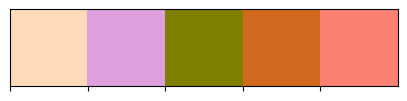

In [73]:

color_mapping = {'PRAD': 'peachpuff', 'LUAD': 'plum', 'BRCA': 'olive', 'KIRC': 'chocolate', 'COAD': 'salmon'}
colors = list(color_mapping.values())

sns.palplot(colors)

In [169]:
# Select numerical columns
genes_expressions = merged_df.select_dtypes(include=['int64', 'float64'])
genes_expressions = genes_expressions.transpose()

# Select categorical columns
cancer_types = merged_df.select_dtypes(include=['object'])

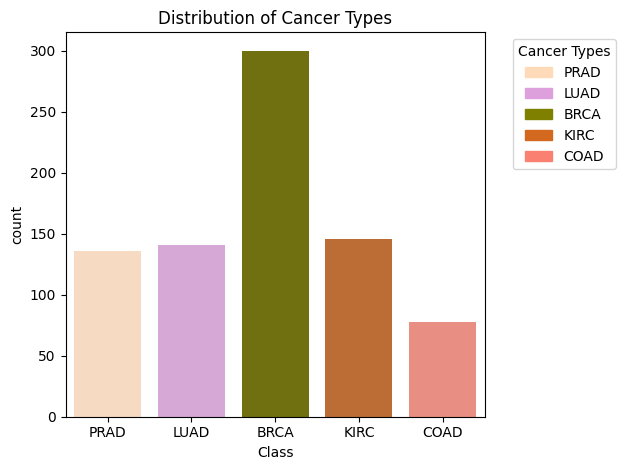

In [170]:
import matplotlib.patches as mpatches

# Create legend handles and labels:
legend_handles = [mpatches.Patch(color=color, label=cancer_type) for cancer_type, color in color_mapping.items()]

# Add the legend with a title:
sns.countplot(data=merged_df, x='Class', hue='Class', palette=colors)

# Add the legend with a title and modify the title
plt.legend(handles=legend_handles, title="Cancer Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Distribution of Cancer Types")
plt.tight_layout()


In [171]:
genes_expressions.shape

(20531, 801)

In [174]:
cancer_types.shape

(801, 1)

In [172]:
genes_expressions.describe()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,...,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,6.514196,6.276564,5.955630,6.295755,6.423980,6.553991,6.486754,6.558027,6.442644,6.307461,...,6.361936,6.153851,6.245023,6.436225,6.570715,6.284252,6.459381,7.074519,6.562049,6.558847
std,4.021607,4.148286,4.234517,4.108170,4.084076,4.014411,4.053986,4.029386,4.063046,4.088474,...,4.091815,4.192973,4.153213,4.062201,3.978395,4.114610,4.036030,3.690176,3.978697,3.978511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.941438,2.006585,1.306846,2.175652,2.516445,2.976345,2.764643,2.897105,2.511620,2.296311,...,2.292546,1.703677,1.968386,2.508961,3.048794,2.106449,2.666211,4.619736,2.991826,2.968326
50%,7.471594,7.484460,6.902737,7.312466,7.576628,7.673069,7.674538,7.752334,7.569362,7.424779,...,7.565003,7.231384,7.316616,7.552116,7.737200,7.465868,7.627833,8.195047,7.598030,7.735597
75%,9.700396,9.697013,9.612764,9.684673,9.701778,9.724144,9.684037,9.739167,9.716863,9.647419,...,9.670456,9.639951,9.663389,9.722071,9.733881,9.649466,9.683210,9.827008,9.756877,9.707233
max,18.525161,17.483123,17.964121,18.371794,17.523432,17.607027,18.142406,17.632378,17.818557,17.853785,...,17.699911,19.442456,18.737029,18.308437,16.935913,18.526167,18.640513,17.081858,18.166516,16.864488


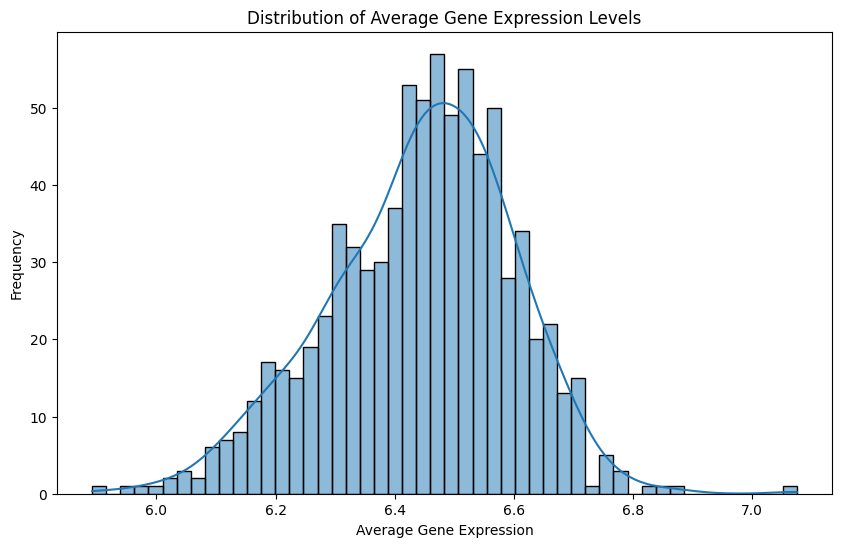

In [18]:
# Calculate the average expression for each gene across all samples
average_gene_expression = np.mean(genes_expressions, axis=0)

# Plot the distribution of average expression levels
plt.figure(figsize=(10, 6))
sns.histplot(average_gene_expression, bins=50, kde=True)
plt.xlabel('Average Gene Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Average Gene Expression Levels')
plt.show()

In [66]:
!pip install fastcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 4.2 MB/s eta 0:00:00


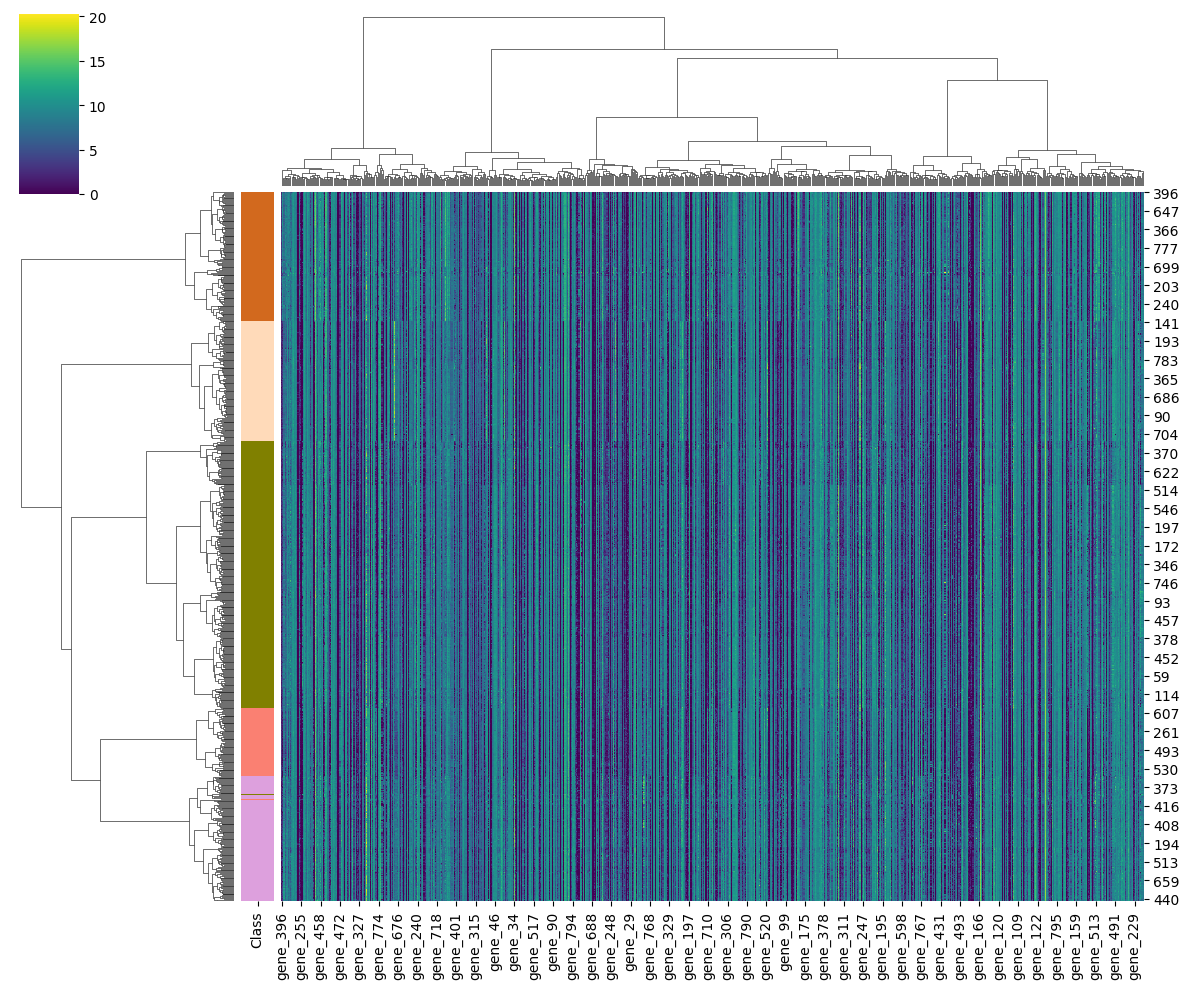

In [75]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Assuming merged_df is your DataFrame with the first column as 'Class'
# and the rest as gene expression data.

# Extract gene expression data and class labels
gene_expression_data = merged_df.drop('Class', axis=1)
class_labels = merged_df['Class']

# Perform hierarchical clustering
# You can change the method and metric if needed
linked = fastcluster.linkage_vector(gene_expression_data, method='ward', metric='euclidean')

# Map the cancer types to the colors
row_colors = class_labels.map(color_mapping)

# Create the clustered heatmap
sns.clustermap(gene_expression_data, row_cluster=True, col_cluster=True,
               row_linkage=linked, col_linkage=linked,
               row_colors=row_colors, figsize=(12, 10), cmap='viridis')

plt.show()

In [120]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = merged_df.drop('Class', axis=1)  # Features
y = merged_df['Class']  # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

anova_results = {}

# Perform hypothesis testing for each gene
# Loop through each genes in the dataset    print(" Reject the null hypothesis H0" )

# Perform ANOVA for each gene
for gene in X_scaled_df.columns:
    gene_expression = np.array(merged_df[gene])
    if np.std(gene_expression) == 0:
       #print(f"Gene: {gene} is constant, skipping...")
        continue

    group_expressions = [gene_expression[merged_df['Class'] == cancer_type] for cancer_type in merged_df['Class'].unique()]
    f_statistic, p_value = f_oneway(*group_expressions)

    # Store results only if p-value < 0.05 (i.e., Reject H0)
    if p_value < 0.05:
        anova_results[gene] = {'F-statistic': f_statistic, 'p-value': p_value}

    #Print results
    #print(f"{gene}: p-value: {p_value:.4f} , F-statistic: {f_statistic:.5f},")


# Convert anova_results dictionary to a DataFrame
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index')
print(anova_results_df)

            F-statistic       p-value
gene_1        23.112465  4.315349e-18
gene_2        60.132731  2.146884e-44
gene_3       114.259977  5.472971e-77
gene_4        37.117862  1.743688e-28
gene_6        10.897032  1.320470e-08
...                 ...           ...
gene_20526    25.051963  1.454614e-19
gene_20527     6.847119  2.023799e-05
gene_20528    21.881278  3.757978e-17
gene_20529    31.709717  1.545891e-24
gene_20530     4.581249  1.158747e-03

[19571 rows x 2 columns]


If the p-value associated with the F-statistic is below a certain threshold (typically 0.05), we can reject the null hypothesis which means "there is a significant difference in the mean expression level of the gene across different cancer types"

In [122]:
# Extract the p-values from the anova_results_df DataFrame
p_values = anova_results_df['p-value'].values
# Apply multiple testing correction
rejected, corrected_pvals, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Update anova_results_df['p-value'] with corrected p-values
anova_results_df['p-value'] = corrected_pvals
anova_results_df['rejected'] = rejected

# Select genes based on variance
variances = anova_results_df.T.var().sort_values(ascending=False)
high_variance_genes = variances.head(int(len(variances) * 0.01)) # Top 1% genes

# Extract the top 3 and bottom 3 genes from the high_variance_genes list
selected_genes = high_variance_genes.head(3).index.tolist() + high_variance_genes.tail(3).index.tolist()

# Print selected genes
print("Selected genes for analysis:", selected_genes)

Selected genes for analysis: ['gene_9175', 'gene_9176', 'gene_220', 'gene_3541', 'gene_4578', 'gene_10098']


Most genes show strong differential expression for specific cancer types compared to all others, suggesting these genes may play key roles in these cancer types. We also performed multitest to reduce the likelihood of false positives due to multiple testing.

In [128]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import pandas as pd

def perform_one_vs_all_ttests(merged_df, gene):
    unique_cancer_types = merged_df['Class'].unique()
    p_values = []

    for cancer_type in unique_cancer_types:
        group1 = merged_df[merged_df['Class'] == cancer_type][gene]
        group2 = merged_df[merged_df['Class'] != cancer_type][gene]

        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        p_values.append(p_val)
        print(f"{cancer_type} vs All for {gene}: p-value = {p_val:.8f}")

    _, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    return corrected_p_values

# Perform "one vs. all" t-tests for each selected gene
for gene in selected_genes:
    print(f"Performing 'one vs. all' t-tests for {gene}:")
    corrected_p_values = perform_one_vs_all_ttests(merged_df, gene)
    print(f"Corrected p-values for {gene}: {corrected_p_values}\n")


Performing 'one vs. all' t-tests for gene_9175:
PRAD vs All for gene_9175: p-value = 0.00000000
LUAD vs All for gene_9175: p-value = 0.00000000
BRCA vs All for gene_9175: p-value = 0.00000000
KIRC vs All for gene_9175: p-value = 0.00000000
COAD vs All for gene_9175: p-value = 0.00000000
Corrected p-values for gene_9175: [1.04336022e-255 7.14327850e-035 8.29662645e-023 1.20319013e-049
 1.03293177e-026]

Performing 'one vs. all' t-tests for gene_9176:
PRAD vs All for gene_9176: p-value = 0.00000000
LUAD vs All for gene_9176: p-value = 0.00000000
BRCA vs All for gene_9176: p-value = 0.00000000
KIRC vs All for gene_9176: p-value = 0.00000000
COAD vs All for gene_9176: p-value = 0.00025240
Corrected p-values for gene_9176: [0.00000000e+00 5.79814474e-50 4.88377641e-28 4.17674307e-42
 2.52400388e-04]

Performing 'one vs. all' t-tests for gene_220:
PRAD vs All for gene_220: p-value = 0.00000000
LUAD vs All for gene_220: p-value = 0.00000000
BRCA vs All for gene_220: p-value = 0.00000000
KIRC 

In [135]:
genes_expressions.T

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [133]:
# Get the mean of each gene
transposed_genes = genes_expressions.transpose()

mean_expression = transposed_genes.mean(axis=0)
# Sort genes by mean expression in descending order
highly_expressed_genes = mean_expression.sort_values(ascending=False)
# Print the top N highly expressed genes (adjust N as needed)
print("Top 10 Highly Expressed Genes: \n", highly_expressed_genes.head(10))


Top 10 Highly Expressed Genes: 
 gene_230      16.430442
gene_5380     16.381964
gene_232      15.967993
gene_18570    15.777747
gene_6857     15.714588
gene_5388     15.658668
gene_1322     15.489623
gene_6698     15.356662
gene_15242    15.161160
gene_3371     15.069407
dtype: float64


In [136]:
# Get the standard deviation of each gene
std_expression = transposed_genes.std(axis=0)

# Sort genes by standard deviation in descending order
highly_variable_genes = std_expression.sort_values(ascending=False)

# Print the top N highly variable genes (adjust N as needed)
print("Top 10 Highly Variable Genes:", highly_variable_genes.head(10))

Top 10 Highly Variable Genes: gene_9176     6.690579
gene_9175     6.030086
gene_15898    5.874003
gene_15301    5.784356
gene_15589    5.596950
gene_3540     5.530614
gene_19661    5.484567
gene_3541     5.359262
gene_11250    5.149358
gene_15897    5.100926
dtype: float64


In [143]:
top_variable_genes = highly_variable_genes.head(5000)
top_expressed_genes = highly_expressed_genes[~highly_expressed_genes.index.isin(top_variable_genes.index)].head(5000)

significant_genes = pd.concat([top_variable_genes, top_expressed_genes], axis=1)
significant_genes.columns = ['Highly Variable Genes', 'Highly Expressed Genes']

significant_genes.head(50)

,Highly Variable Genes,Highly Expressed Genes
gene_9176,6.690579,NaN
gene_9175,6.030086,NaN
gene_15898,5.874003,NaN
gene_15301,5.784356,NaN
gene_15589,5.596950,NaN
gene_3540,5.530614,NaN
gene_19661,5.484567,NaN
gene_3541,5.359262,NaN
gene_11250,5.149358,NaN
gene_15897,5.100926,NaN


In [144]:
significant_genes = significant_genes.fillna(0)

In [145]:
significant_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, gene_9176 to gene_18842
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Highly Variable Genes   10000 non-null  float64
 1   Highly Expressed Genes  10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4+ KB


In [152]:
reduced_genes_df = pd.merge(left=genes_expressions, right=significant_genes, left_index=True, right_index=True)

In [153]:
reduced_genes_df

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,Highly Variable Genes,Highly Expressed Genes
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367,0.000000,9.813612
gene_18,0.591871,0.000000,1.683023,1.267356,0.889707,0.894294,9.466878,0.000000,0.635336,0.000000,...,0.789354,0.416948,6.541532,0.496922,0.000000,1.002595,0.000000,0.000000,3.194977,0.000000
gene_21,0.000000,0.000000,3.660427,0.000000,0.000000,4.002901,0.000000,0.000000,4.773828,5.784391,...,3.216564,4.574931,6.688964,1.955573,0.000000,5.179822,0.000000,4.709103,2.448633,0.000000
gene_26,7.215116,9.949812,6.096650,3.913761,1.942120,0.894294,0.000000,5.145527,6.080374,0.724214,...,1.496104,2.228542,2.041944,0.000000,9.169589,1.325099,3.450934,3.485246,2.667242,0.000000
gene_28,6.620204,1.174790,7.680507,6.469165,5.861429,7.220446,4.485420,4.664710,2.824931,6.118104,...,5.638025,6.869896,5.098382,6.139531,3.480317,4.362533,5.514419,6.164110,2.049775,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20525,9.119813,8.381612,9.911597,9.601208,9.846910,9.816001,9.802692,9.994339,10.952880,9.923582,...,9.926775,10.246230,10.475561,9.614701,9.064002,9.350636,9.626383,10.102934,0.000000,9.741987
gene_20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081,0.000000,11.742228
gene_20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358,0.000000,10.155271
gene_20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794,0.000000,9.590726


In [154]:
reduced_genes_df = reduced_genes_df.iloc[:, :-2]

In [155]:
reduced_genes_df

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367
gene_18,0.591871,0.000000,1.683023,1.267356,0.889707,0.894294,9.466878,0.000000,0.635336,0.000000,...,0.000000,3.284988,0.789354,0.416948,6.541532,0.496922,0.000000,1.002595,0.000000,0.000000
gene_21,0.000000,0.000000,3.660427,0.000000,0.000000,4.002901,0.000000,0.000000,4.773828,5.784391,...,7.781347,6.612022,3.216564,4.574931,6.688964,1.955573,0.000000,5.179822,0.000000,4.709103
gene_26,7.215116,9.949812,6.096650,3.913761,1.942120,0.894294,0.000000,5.145527,6.080374,0.724214,...,1.887330,0.645517,1.496104,2.228542,2.041944,0.000000,9.169589,1.325099,3.450934,3.485246
gene_28,6.620204,1.174790,7.680507,6.469165,5.861429,7.220446,4.485420,4.664710,2.824931,6.118104,...,5.951583,5.785977,5.638025,6.869896,5.098382,6.139531,3.480317,4.362533,5.514419,6.164110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_20525,9.119813,8.381612,9.911597,9.601208,9.846910,9.816001,9.802692,9.994339,10.952880,9.923582,...,10.040961,10.198568,9.926775,10.246230,10.475561,9.614701,9.064002,9.350636,9.626383,10.102934
gene_20526,12.003135,12.674552,9.045255,11.392682,11.922439,11.556995,13.256060,12.670377,12.498919,11.144295,...,11.035335,10.864960,10.703722,10.790014,10.961247,12.031267,11.633422,12.180944,11.198279,11.641081
gene_20527,9.650743,10.517059,9.788359,9.694814,9.217749,9.244150,9.664486,9.987733,10.389954,9.244851,...,11.030377,9.617853,9.144204,10.698991,10.203226,9.813063,10.317266,10.681194,10.335513,10.607358
gene_20528,8.921326,9.397854,10.090470,9.684365,9.461191,9.836473,9.244219,9.216872,10.390255,9.484299,...,10.119304,12.813320,9.682057,10.081523,10.030005,10.092770,8.745983,9.466711,10.400581,9.844794


In [236]:
from sklearn.decomposition import PCA

# Assume X is your high-dimensional data
X = reduced_genes_df.T
y = cancer_types.values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
X.shape

(801, 10000)

In [184]:
y.shape

(801, 1)

**PCA**

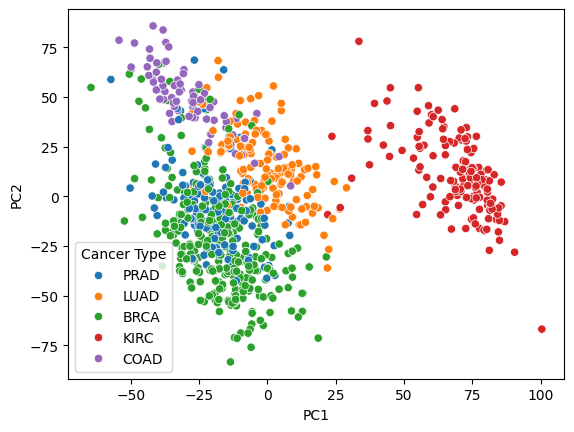

In [281]:
pca_2 = PCA(n_components=2)  # for 2D visualization
X_pca = pca_2.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the cancer type information back into the DataFrame
pca_df['Cancer Type'] = cancer_types

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_df)
plt.show()

PCA 2

It effectively reduces the high-dimensional data to two dimensions using PCA and provides insights into the distribution of different cancer types. The use of color to represent different cancer types allows for easy differentiation and understanding of the data.

The plot shows there are distinct clusters formed by different cancer types, indicating that the gene expression patterns vary across different cancer types.

Although some gnenes overlap between the clusters, the plot does not show clear separation between all cancer types


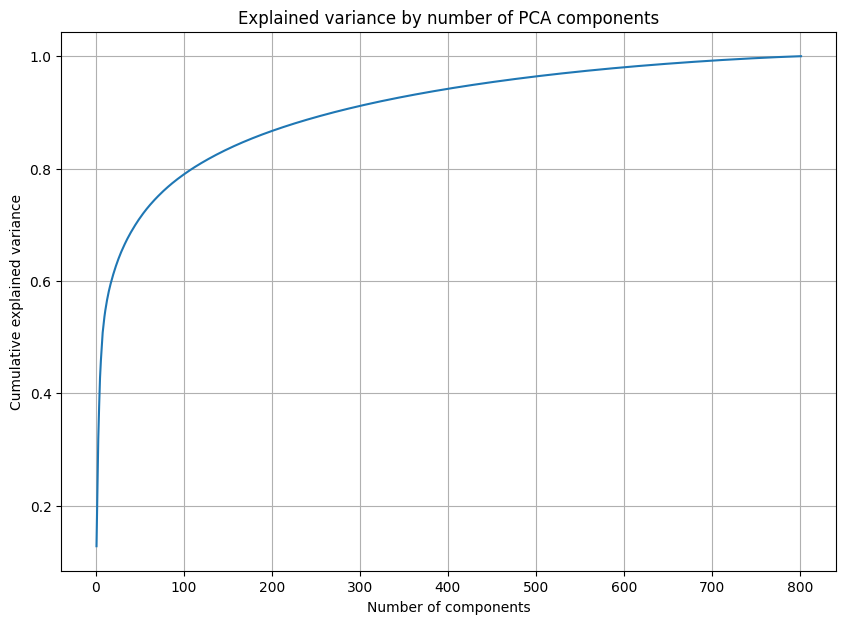

In [282]:
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by number of PCA components')
plt.grid(True)
plt.show()

**Cumulative Explained Variance Plot**: This plot shows the cumulative sum of the explained variances for the components. The 'elbow' or point where the curve starts to level off is often used to decide how many components to keep.


The curve starts to flatten around 150 - 200 PCs, suggesting a potential elbow point in this range.


In [239]:
# Try different numbers of PCs around the initial guess and knee point
for n_components in [50, 100 , 150, 200, 250 , 300 , 350 , 400 , 450 , 500 , 550 , 600 , 650 , 700]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Repeat validation and other analyses for each PC set

    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"{n_components} component :", explained_variance_ratio.sum())  # Check how much variance is captured


50 component : 0.7112238151404385
100 component : 0.7882654544569703
150 component : 0.833348208578453
200 component : 0.8652578982814173
250 component : 0.8899356166524954
300 component : 0.9100352546163734
350 component : 0.9266461659117622
400 component : 0.9407116586575289
450 component : 0.9527381549744242
500 component : 0.9630958682982034
550 component : 0.971964122583222
600 component : 0.9796416768470878
650 component : 0.9867307878228545
700 component : 0.992162833649376


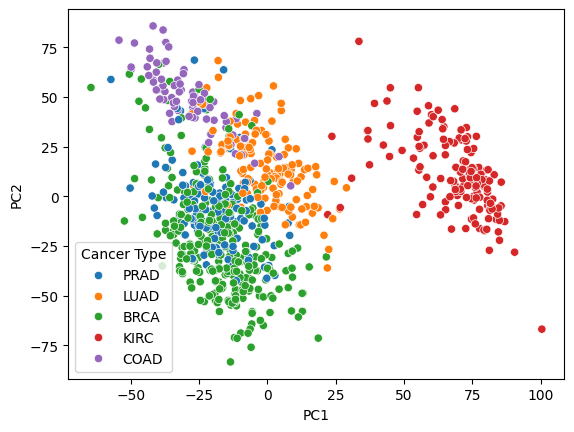

In [283]:
pca_200 = PCA(n_components=200)
X_pca200 = pca_200.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_200_df = pd.DataFrame(data=X_pca200, columns=[f'PC{i+1}' for i in range(200)])

# Add the cancer type information back into the DataFrame
pca_200_df['Cancer Type'] = cancer_types

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_200_df)
plt.show()

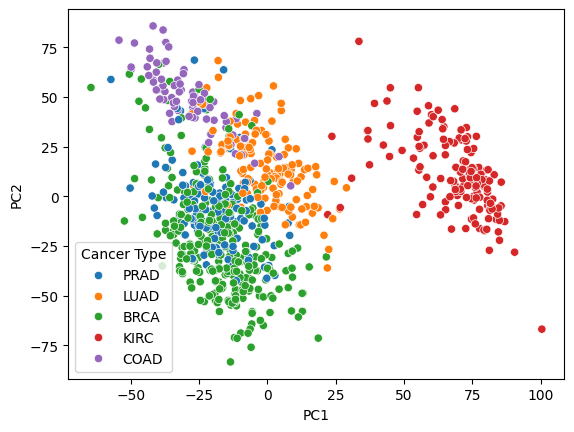

In [284]:
pca_600 = PCA(n_components=600)
X_pca600 = pca_600.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_600_df = pd.DataFrame(data=X_pca600, columns=[f'PC{i+1}' for i in range(600)])

# Add the cancer type information back into the DataFrame
pca_600_df['Cancer Type'] = cancer_types

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Cancer Type', data=pca_600_df)
plt.show()

**LDA**

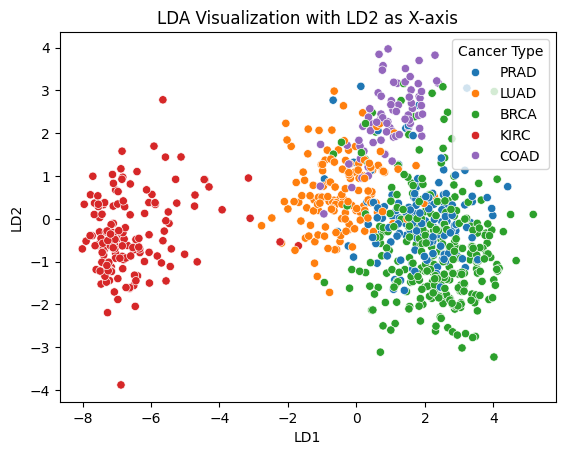

In [285]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y_values = cancer_types.values
#y to 1 dimensional array
y = y_values.ravel()

# Create an LDA that will reduce the data down to  feature
lda = LDA(n_components=2)

# run an LDA and use it to transform the features
X_lda = lda.fit_transform(X, y)  # Replace y with cancer_types.values

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])

# Add the cancer type information back into the DataFrame
lda_df['Cancer Type'] = y

# Plot the LDA
sns.scatterplot(x='LD1', y='LD2', hue='Cancer Type', data=lda_df)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Visualization with LD2 as X-axis')
# Add the legend with a title:
plt.show()


**T-sne**

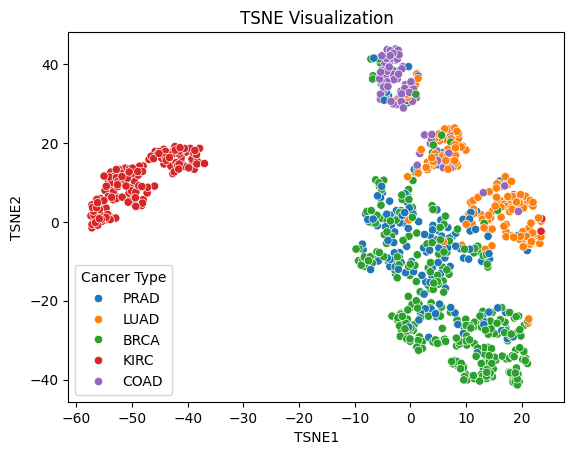

In [286]:
from sklearn.manifold import TSNE

# Apply t-SNE with 2 components for visualization
tsne = TSNE(n_components=2, random_state=42, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])

# Add the cancer type information back into the DataFrame
tsne_df['Cancer Type'] = cancer_types

# Plot the LDA
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cancer Type', data=tsne_df)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Visualization')
# Add the legend with a title:
plt.show()


## Project Task: Week 2

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)


**K-means**

K-means with PCA = 2



In [287]:
from sklearn.cluster import KMeans

# Assume pca_df contains the PCA-transformed data
X = pca_df[['PC1', 'PC2']]  # Use the PCA-transformed data for clustering

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(X)  # Fit and get cluster assignments

# Add cluster labels to the DataFrame
pca_df['Cluster'] = clusters

# Print the cluster centers
print(kmeans.cluster_centers_)

[[ 70.11844921  10.07346137]
 [-22.42112428  -7.92449347]
 [-10.18544099 -40.59912506]
 [ -0.13113854  12.80817393]
 [-29.50277789  50.33034016]]


In [288]:
clusters

array([4, 3, 1, 1, 2, 1, 0, 3, 2, 1, 1, 0, 1, 4, 1, 2, 3, 0, 0, 1, 2, 0,
       3, 1, 0, 3, 4, 2, 1, 1, 1, 2, 0, 3, 1, 2, 0, 3, 1, 4, 0, 1, 1, 0,
       0, 2, 3, 4, 2, 3, 2, 3, 1, 1, 4, 4, 2, 3, 0, 2, 3, 3, 2, 3, 1, 4,
       1, 1, 0, 3, 0, 1, 1, 3, 2, 3, 2, 4, 1, 4, 2, 1, 2, 2, 3, 1, 1, 1,
       0, 1, 1, 1, 2, 4, 2, 1, 4, 2, 2, 1, 1, 0, 2, 0, 3, 0, 4, 4, 4, 3,
       4, 2, 3, 1, 2, 0, 0, 0, 2, 2, 3, 0, 3, 1, 1, 3, 1, 2, 0, 1, 4, 4,
       4, 1, 1, 0, 3, 1, 0, 4, 2, 1, 2, 0, 2, 4, 3, 2, 3, 3, 3, 3, 2, 2,
       3, 1, 2, 1, 3, 3, 4, 3, 0, 1, 1, 3, 4, 0, 3, 2, 0, 3, 2, 3, 2, 1,
       1, 1, 1, 0, 4, 0, 2, 1, 1, 2, 3, 3, 1, 3, 3, 0, 4, 2, 3, 2, 4, 2,
       4, 3, 2, 0, 0, 0, 0, 2, 4, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 2, 3, 1,
       0, 3, 0, 0, 3, 2, 0, 1, 2, 3, 4, 2, 4, 4, 0, 2, 0, 4, 1, 0, 0, 1,
       1, 3, 3, 3, 0, 2, 1, 4, 1, 1, 3, 2, 1, 0, 4, 2, 1, 2, 3, 4, 3, 4,
       4, 1, 1, 1, 2, 0, 0, 1, 4, 4, 0, 1, 2, 2, 0, 2, 2, 1, 4, 3, 3, 2,
       2, 1, 0, 0, 0, 0, 3, 2, 1, 0, 2, 2, 3, 1, 1,

In [290]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          801 non-null    float64
 1   PC2          801 non-null    float64
 2   Cancer Type  801 non-null    object 
 3   Cluster      801 non-null    int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 22.0+ KB


In [289]:
print(pca_df['Cluster'].value_counts())

1    206
2    185
3    155
0    141
4    114
Name: Cluster, dtype: int64


In [291]:
# Analyze the cluster assignments for each cancer type
for cancer_type in pca_df['Cancer Type'].unique():
    print(f"\n{cancer_type} cluster counts:")
    print(pca_df[pca_df['Cancer Type'] == cancer_type]['Cluster'].value_counts())


PRAD cluster counts:
1    88
2    26
3    13
4     9
Name: Cluster, dtype: int64

LUAD cluster counts:
3    117
4     16
1      5
2      3
Name: Cluster, dtype: int64

BRCA cluster counts:
2    156
1    113
4     19
3     12
Name: Cluster, dtype: int64

KIRC cluster counts:
0    141
3      4
4      1
Name: Cluster, dtype: int64

COAD cluster counts:
4    69
3     9
Name: Cluster, dtype: int64


In [292]:
#cross-tabulation of cluster labels and cancer types
cluster_cancer_grouped = pca_df.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)
cluster_cancer_grouped

Cancer Type,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,0,0,141,0,0
1,113,0,0,5,88
2,156,0,0,3,26
3,12,9,4,117,13
4,19,69,1,16,9


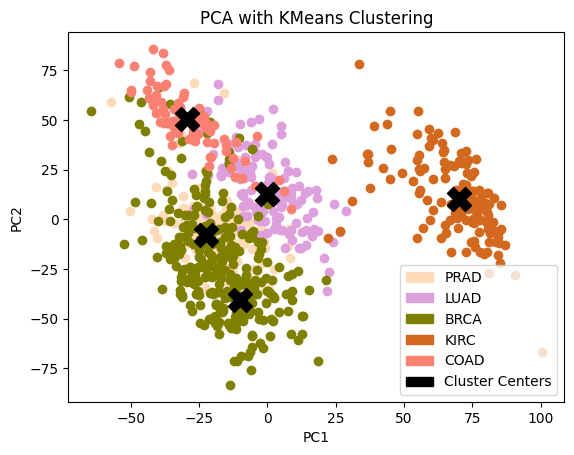

In [293]:
# Create a scatter plot of the PCA data
# Assuming pca_df has columns 'PC1', 'PC2', and 'Cancer Type'
for cancer_type in pca_df['Cancer Type'].unique():
    subset = pca_df[pca_df['Cancer Type'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, color=color_mapping[cancer_type])

# Plot the cluster centers from KMeans
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Cluster Centers')

# Create legend handles based on the color mapping
legend_handles = [mpatches.Patch(color=color, label=cancer_type) for cancer_type, color in color_mapping.items()]

# Add the legend with cluster centers
plt.legend(handles=legend_handles + [mpatches.Patch(color='black', label='Cluster Centers')])

# Add titles and labels (optional)
plt.title('PCA with KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display the plot
plt.show()

K-means with PCA = 200



In [294]:
# For pca_200_df
X_200 = pca_200_df.drop('Cancer Type', axis=1)

# Apply KMeans clustering
kmeans_200 = KMeans(n_clusters=5, n_init=10)
clusters_200 = kmeans_200.fit_predict(X_200)  # Fit and get cluster assignments

# Add cluster labels to the DataFrame
pca_200_df['Cluster'] = clusters_200

# Print the cluster centers
#print(kmeans_200.cluster_centers_)

In [295]:
print(pca_200_df['Cluster'].value_counts())

4    242
1    203
0    145
3    137
2     74
Name: Cluster, dtype: int64


In [296]:
# Analyze the cluster assignments for each cancer type
for cancer_type in pca_200_df['Cancer Type'].unique():
    print(f"\n{cancer_type} cluster counts:")
    print(pca_200_df[pca_200_df['Cancer Type'] == cancer_type]['Cluster'].value_counts())


PRAD cluster counts:
3    136
Name: Cluster, dtype: int64

LUAD cluster counts:
1    141
Name: Cluster, dtype: int64

BRCA cluster counts:
4    242
1     57
3      1
Name: Cluster, dtype: int64

KIRC cluster counts:
0    145
1      1
Name: Cluster, dtype: int64

COAD cluster counts:
2    74
1     4
Name: Cluster, dtype: int64


In [297]:
#cross-tabulation of cluster labels and cancer types
cluster_cancer_grouped = pca_200_df.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)
cluster_cancer_grouped

Cancer Type,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,0,0,145,0,0
1,57,4,1,141,0
2,0,74,0,0,0
3,1,0,0,0,136
4,242,0,0,0,0


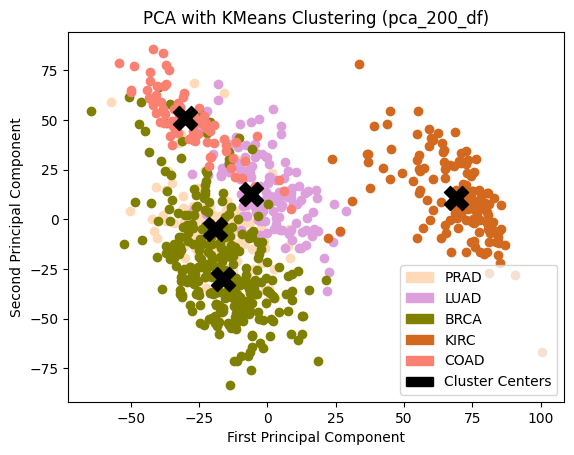

In [298]:
# Create a scatter plot of the pca_200_df
for cancer_type in pca_200_df['Cancer Type'].unique():
    subset = pca_200_df[pca_200_df['Cancer Type'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, color=color_mapping[cancer_type])

# Plot the cluster centers from KMeans
plt.scatter(kmeans_200.cluster_centers_[:, 0], kmeans_200.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Cluster Centers')

# Create legend handles based on the color mapping
legend_handles = [mpatches.Patch(color=color, label=cancer_type) for cancer_type, color in color_mapping.items()]

# Add the legend with cluster centers
plt.legend(handles=legend_handles + [mpatches.Patch(color='black', label='Cluster Centers')])

# Adding plot title and labels
plt.title('PCA with KMeans Clustering (pca_200_df)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Display the plot
plt.show()

In [335]:
# For pca_200_df
ground_truth_200 = pca_200_df['Cancer Type'].map({'BRCA': 0, 'COAD': 1 , 'KIRC': 2, 'PRAD': 3 , 'LUAD': 4})
pred_y_200 = pca_200_df['Cluster']
misclassifications_200 = (ground_truth_200 != pred_y_200).sum()
classification_error_200 = (misclassifications_200 / ground_truth_200.shape[0]) * 100
print(f"Classification error for pca_200_df: {classification_error_200:.2f}%")


Classification error for pca_200_df: 82.52%


PCA = 600

In [300]:
# For pca_600_df
X_600 = pca_600_df.drop('Cancer Type', axis=1)

# Apply KMeans clustering
kmeans_600 = KMeans(n_clusters=5, n_init=10)
clusters_600 = kmeans_600.fit_predict(X_600)  # Fit and get cluster assignments

# Add cluster labels to the DataFrame
pca_600_df['Cluster'] = clusters_600

# Print the cluster centers
print(kmeans_600.cluster_centers_)

[[ 6.89741746e+01  1.05664914e+01  3.23212345e+00 ...  3.83950677e-03
   1.11248209e-03  9.02007958e-04]
 [-5.83172770e+00  1.34421315e+01 -1.80309611e+01 ...  2.35047848e-03
   3.85395504e-03  1.14251059e-02]
 [-1.62846320e+01 -3.02110041e+01 -1.16677467e+01 ...  1.30056028e-02
   7.22369994e-03  7.83217442e-04]
 [-3.02374423e+01  5.10114054e+01 -2.60463692e+01 ... -3.51830577e-02
  -2.95443137e-02 -9.00585369e-03]
 [-1.91099058e+01 -4.65232613e+00  5.78826774e+01 ... -1.16714998e-02
  -3.73911266e-03 -1.42475134e-02]]


In [301]:
print(pca_600_df['Cluster'].value_counts())

2    244
1    201
0    145
4    137
3     74
Name: Cluster, dtype: int64


In [302]:
# Analyze the cluster assignments for each cancer type
for cancer_type in pca_600_df['Cancer Type'].unique():
    print(f"\n{cancer_type} cluster counts:")
    print(pca_600_df[pca_600_df['Cancer Type'] == cancer_type]['Cluster'].value_counts())


PRAD cluster counts:
4    136
Name: Cluster, dtype: int64

LUAD cluster counts:
1    141
Name: Cluster, dtype: int64

BRCA cluster counts:
2    244
1     55
4      1
Name: Cluster, dtype: int64

KIRC cluster counts:
0    145
1      1
Name: Cluster, dtype: int64

COAD cluster counts:
3    74
1     4
Name: Cluster, dtype: int64


In [303]:
#cross-tabulation of cluster labels and cancer types
cluster_cancer_grouped = pca_600_df.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)
cluster_cancer_grouped

Cancer Type,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,0,0,145,0,0
1,55,4,1,141,0
2,244,0,0,0,0
3,0,74,0,0,0
4,1,0,0,0,136


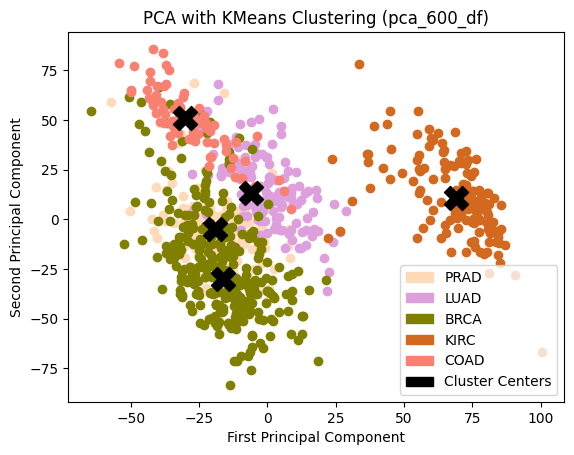

In [304]:
# Create a scatter plot of the PCA data
for cancer_type in pca_600_df['Cancer Type'].unique():
    subset = pca_600_df[pca_600_df['Cancer Type'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, color=color_mapping[cancer_type])

# Plot the cluster centers from KMeans
plt.scatter(kmeans_600.cluster_centers_[:, 0], kmeans_600.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Cluster Centers')

# Create legend handles based on the color mapping
legend_handles = [mpatches.Patch(color=color, label=cancer_type) for cancer_type, color in color_mapping.items()]

# Add the legend with cluster centers
plt.legend(handles=legend_handles + [mpatches.Patch(color='black', label='Cluster Centers')])

# Adding plot title and labels
plt.title('PCA with KMeans Clustering (pca_600_df)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Display the plot
plt.show()

In [305]:
# For pca_600_df
ground_truth_600 = pca_600_df['Cancer Type'].map({'KIRC': 0, 'PRAD': 1 , 'LUAD': 2, 'COAD': 3 , 'BRCA': 4})
pred_y_600 = pca_600_df['Cluster']
misclassifications_600 = (ground_truth_600 != pred_y_600).sum()
classification_error_600 = (misclassifications_600 / ground_truth_600.shape[0]) * 100
print(f"Classification error for pca_600_df: {classification_error_600:.2f}%")

Classification error for pca_600_df: 72.53%


he classification error for different sets of predictions (`pca_200_df` and `pca_600_df`), which helps assess how well the clustering aligns with the actual cancer types.


We have applied K-means clustering on the gene expression data, which groups genes with similar expression values across all samples, samples of each cancer type. K-means clustering is an unsupervised learning method, which means it doesn't use the class labels (cancer types) during the clustering process. Any correspondence between the clusters and the class labels is assessed after the clustering is done.

1. **Genes whose expression values are similar across all samples**:

2. **Genes whose expression values are similar across samples of each cancer type**:  we've grouped genes based on their expression values within each cancer type. Genes that are assigned to the same cluster have similar expression patterns within the samples of a specific cancer type.

3. **Samples of the same class (cancer type) which also correspond to the same cluster**

4. **Samples identified to be belonging to another cluster but also to the same class (cancer type)**


#Final Task

**Build a classification model(s)**
using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types


**RandomForest & SVM for all datasets**

1. **Multiclass SVM**: SVM is a binary classifier by nature. It separates data points using a line in the case of 2D data, a plane in the case of 3D data, or a hyperplane for higher dimensions.

2. **Random Forest**: This is an ensemble learning method that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# For the original dataset
X_original = genes_expressions.T
y = cancer_types.values
y_original = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_original.predict(X_test)
print("Random Forest with Original Dataset:", accuracy_score(y_test, y_pred))

# Building SVM Model
svm_original = SVC(kernel='linear')
svm_original.fit(X_train, y_train)
y_pred = svm_original.predict(X_test)
print("SVM with Original Dataset:" ,  accuracy_score (y_test, y_pred))


Random Forest with Original Dataset: 1.0
SVM with Original Dataset: 1.0


In [310]:
# For the slightly reduced dataset
X_reduced = reduced_genes_df.T
y_reduced =  y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train, y_train)
y_pred = rf_reduced.predict(X_test)
print("Random Forest with Reduced Dataset:", accuracy_score(y_test, y_pred))

# Building SVM Model
svm_reduced = SVC(kernel='linear')
svm_reduced.fit(X_train, y_train)
y_pred = svm_reduced.predict(X_test)
print("SVM with Reduced Dataset:" ,  accuracy_score (y_test, y_pred))


Random Forest with Reduced Dataset: 1.0
SVM with Reduced Dataset: 1.0


In [311]:
#  pca_600_df
X_pca600 = pca_600_df .drop(['Cancer Type', 'Cluster'], axis=1)
y_pca600 = pca_600_df ['Cancer Type']

X_train, X_test, y_train, y_test = train_test_split(X_pca600, y_pca600 , test_size=0.3, random_state=42)

# Building the Random Forest model
rf_pca600 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca600.fit(X_train, y_train)
y_pred = rf_pca600.predict(X_test)
print("Random Forest with PCA_600 Dataset:", accuracy_score(y_test, y_pred))

# Building SVM Model
pca_600_svm_model = SVC(kernel='linear')
pca_600_svm_model .fit(X_train, y_train)
y_pred = pca_600_svm_model .predict(X_test)
print("SVM with PCA_600 Dataset:" ,accuracy_score(y_test, y_pred))


Random Forest with PCA_600 Dataset: 0.8589211618257261
SVM with PCA_600 Dataset: 1.0


In [336]:
#for lda_df
X_lda = lda_df.drop(['Cancer Type'], axis=1)
y_lda = lda_df['Cancer Type']

X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lda.fit(X_train, y_train)
y_rf_pred = rf_lda.predict(X_test)
print("Random Forest with lda Dataset:", accuracy_score(y_test, y_rf_pred))

# Building SVM Model
svm_model_lda = SVC(kernel='linear')
svm_model_lda.fit(X_train, y_train)
y_svm_pred = svm_model_lda.predict(X_test)
print("SVM with lda Dataset:" ,accuracy_score(y_test, y_svm_pred))


Random Forest with lda Dataset: 0.7095435684647303
SVM with lda Dataset: 0.7634854771784232


The classification reports for both the SVM and Random Forest models on the LDA dataset show excellent performance across all classes. Both models have high precision, recall, and f1-score for each class, and the overall accuracy is 0.99. This suggests that both models are doing a great job of classifying each cancer type.

Given these results, the LDA dataset seems like a good choice for feature selection and performance validation. Since the models are already performing very well on this dataset, feature selection might not lead to a significant improvement in performance. However, it can still be useful for interpretability, as it can help you identify the most important genes for classifying each cancer type.

 **Feature Selection**

In [314]:
from sklearn.feature_selection import RFE

# Feature selection for Random Forest
rfe_rf = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
rfe_rf.fit(X_train, y_train)
X_train_rf_selected = rfe_rf.transform(X_train)
X_test_rf_selected = rfe_rf.transform(X_test)

# Retrain the model with selected features
rf_lda.fit(X_train_rf_selected, y_train)
y_pred = rf_lda.predict(X_test_rf_selected)
print("Random Forest with lda Dataset (with feature selection):", accuracy_score(y_test, y_pred))
print("Random Forest with lda Dataset (with feature selection):", classification_report(y_test, y_pred))

# Feature selection for SVM
rfe_svm = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe_svm.fit(X_train, y_train)
X_train_svm_selected = rfe_svm.transform(X_train)
X_test_svm_selected = rfe_svm.transform(X_test)

# Retrain the model with selected features
svm_model_lda.fit(X_train_svm_selected, y_train)
y_pred = svm_model_lda.predict(X_test_svm_selected)
print("SVM with lda Dataset (with feature selection):" ,accuracy_score(y_test, y_pred))
print("SVM with lda Dataset (with feature selection):" ,classification_report(y_test, y_pred))

Random Forest with lda Dataset (with feature selection): 0.7095435684647303
Random Forest with lda Dataset (with feature selection):               precision    recall  f1-score   support

        BRCA       0.71      0.67      0.69        90
        COAD       0.71      0.79      0.75        28
        KIRC       1.00      0.98      0.99        41
        LUAD       0.74      0.88      0.80        40
        PRAD       0.36      0.33      0.35        42

    accuracy                           0.71       241
   macro avg       0.71      0.73      0.71       241
weighted avg       0.71      0.71      0.71       241

SVM with lda Dataset (with feature selection): 0.7634854771784232
SVM with lda Dataset (with feature selection):               precision    recall  f1-score   support

        BRCA       0.69      0.93      0.79        90
        COAD       0.81      0.79      0.80        28
        KIRC       1.00      0.98      0.99        41
        LUAD       0.73      0.95      0.83     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Precision: Indicates the accuracy of positive predictions for each cancer type.
* Recall: Shows the ability of the model to find all the positive samples for each cancer type.
* F1-Score: Provides a balance between precision and recall. It's particularly useful if there's an uneven class distribution.
* Accuracy: Gives an overall effectiveness of the classifier.

**DNN**

In [316]:
!pip install tensorflow keras

In [326]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder

# Assuming genes_expressions is your feature data and y is your target data
X_original = genes_expressions.T

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder on the y data
encoder.fit(y.reshape(-1, 1))

# Transform the y data using the encoder
y_one_hot = encoder.transform(y.reshape(-1, 1)).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y_one_hot, test_size=0.3, random_state=42)

In [327]:
#DNN

# Initialize Sequential model
model = Sequential()

# Add input layer
model.add(Dense(1024, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

# Add 1st hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add 2nd hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
18/18 [==============================] - 3s 130ms/step - loss: 218.6719 - accuracy: 0.2518
Epoch 2/10
18/18 [==============================] - 2s 126ms/step - loss: 108.6325 - accuracy: 0.2446
Epoch 3/10
18/18 [==============================] - 2s 131ms/step - loss: 21.8607 - accuracy: 0.2929
Epoch 4/10
18/18 [==============================] - 2s 123ms/step - loss: 2.4005 - accuracy: 0.3643
Epoch 5/10
18/18 [==============================] - 2s 124ms/step - loss: 1.9022 - accuracy: 0.3696
Epoch 6/10
18/18 [==============================] - 2s 124ms/step - loss: 1.5934 - accuracy: 0.3750
Epoch 7/10
18/18 [==============================] - 2s 136ms/step - loss: 1.5829 - accuracy: 0.3750
Epoch 8/10
18/18 [==============================] - 3s 143ms/step - loss: 1.5711 - accuracy: 0.3750
Epoch 9/10
18/18 [==============================] - 2s 130ms/step - loss: 1.5602 - accuracy: 0.3750
Epoch 10/10
8/8 [==============================] - 0s 15ms/step - loss: 1.5513 - accuracy: 0.37

We could try adding more hidden layers, changing the number of units in the hidden layers, adjusting the dropout rate, or using different types of regularization to achieve the best result.

In [340]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assuming genes_expressions is your feature data and y is your target data
X_original = genes_expressions.T

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder on the y data
encoder.fit(y.reshape(-1, 1))

# Transform the y data using the encoder
y_one_hot = encoder.transform(y.reshape(-1, 1)).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y_one_hot, test_size=0.3, random_state=42)

# Initialize Sequential model
model = Sequential()

# Add input layer
model.add(Dense(1024, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))

# Normalize the data
model.add(BatchNormalization())

# Add 1st hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add 2nd hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(5, activation='softmax'))  # Assuming 5 cancer types

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/30
18/18 [==============================] - 4s 152ms/step - loss: 0.2633 - accuracy: 0.9071 - val_loss: 174.4293 - val_accuracy: 0.3734
Epoch 2/30
18/18 [==============================] - 2s 131ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 82.1122 - val_accuracy: 0.3734
Epoch 3/30
18/18 [==============================] - 2s 132ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 71.1975 - val_accuracy: 0.1162
Epoch 4/30
18/18 [==============================] - 2s 133ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 41.0017 - val_accuracy: 0.1162
Epoch 5/30
18/18 [==============================] - 3s 144ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 18.8193 - val_accuracy: 0.4481
Epoch 6/30
18/18 [==============================] - 2s 135ms/step - loss: 5.3587e-04 - accuracy: 1.0000 - val_loss: 9.4003 - val_accuracy: 0.6266
Epoch 7/30
18/18 [==============================] - 2s 134ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.6305 - val_accuracy: 0.6


We added more hidden layers, used the Adam optimizer and categorical cross-entropy loss, which are good choices for this type of problem. We've also added an EarlyStopping callback to stop training when the validation accuracy stops improving, which can help prevent overfitting.

**Early Stopping Trigger:** The training stops at epoch 20 due to early stopping, a mechanism we implemented to prevent overfitting. The early stopping callback is set to monitor the validation accuracy and restore the best model weights. It stops training because the validation accuracy hasn't improved for several epochs (patience parameter).

**Restoring Best Weights:** The message "Restoring model weights from the end of the best epoch" indicates that the model's weights are rolled back to those of the epoch where the validation accuracy was highest.


In [341]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              21024768  
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                      


Model Type: "sequential_6" indicates that your model is a sequential model, which is a linear stack of layers.



**Just Some Notes for me:**

As for the optimizer, both Adam and SGD are popular choices:

- Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. It adapts the learning rate for each weight individually, giving it advantages over methods that adapt a single global learning rate for all weights.

- SGD, or Stochastic Gradient Descent, is a type of optimization algorithm that estimates the error gradient for the current state of the model using examples from the training dataset, then updates the weights of the model using this estimated error gradient.

In practice, Adam is often recommended as the default optimizer to use, and it's very effective in situations with large amounts of data and many parameters. However, SGD can outperform Adam if tuned properly, especially in the later stages of training and in settings with a small amount of data.

In [342]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print('Confusion Matrix:')
print(cm)

8/8 [==============================] - 0s 17ms/step
Confusion Matrix:
[[90  0  0  0  0]
 [ 0 28  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 42]]


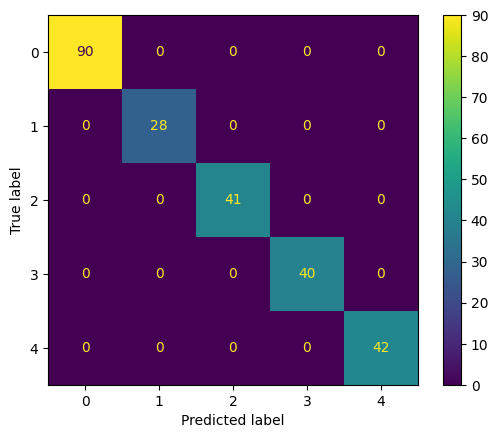

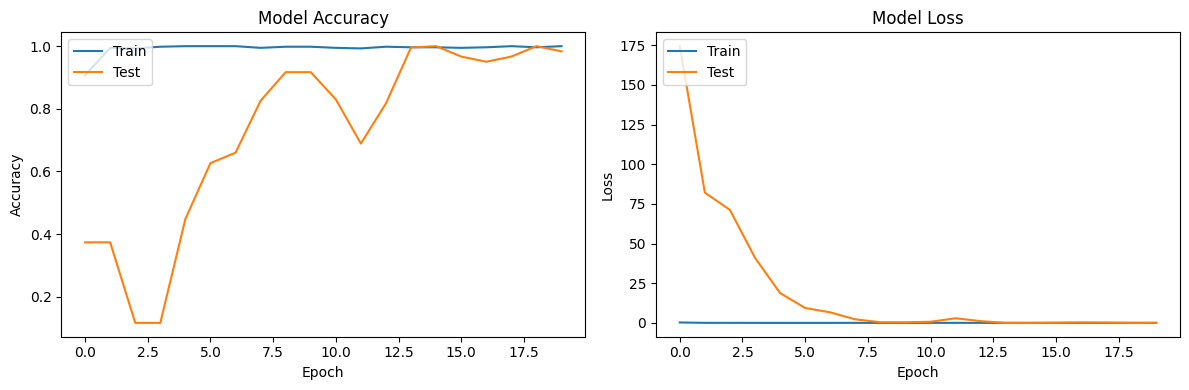

In [343]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Confusion Matrix: The first plot in the top left corner is a confusion matrix, which shows the number of correct and incorrect predictions made by the model with true labels on the y-axis and predicted labels on the x-axis. The diagonal from top left to bottom right shows the number of correct predictions for each class (0 to 4), with all values off the diagonal being zero, indicating there are no misclassifications. This is a sign of perfect classification by the model on the test set.

In [344]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Loss: {train_loss}')

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')

Training Accuracy: 0.9982143044471741
Training Loss: 0.003646041266620159
Testing Accuracy: 1.0
Testing Loss: 0.0014910942409187555
